### 1) Problem statement
This project understands how the Mealage per galon of a car is affected by other variables such as (cylinders, displacement, horsepower, weight, acceleration, model_year,	origin, car_name)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data/auto-mpg.csv',delimiter=",")

In [6]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## 2- Data Checks to perform

- Check Missing values

- Check Duplicates

- Check data type

- Check the number of unique values of each column

- Check statistics of data set

- Check various categories present in the different categorical column

### 2.1- Check Missing values

In [12]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

##### There are no missing values in the dataset

### 2.2- Check Duplicates

In [14]:
data.duplicated().sum()

0

##### There are no duplicates values in the dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [38]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [50]:
data.nunique()


mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [27]:
data['horsepower'] = data['horsepower'].replace('?', np.nan)

In [28]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [31]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [34]:
numeric_features = [ feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [ feature for feature in data.columns if data[feature].dtype == 'O']

print("Numerical features are :")
print(numeric_features)

print("Categorical features are :")
print(categorical_features)

Numerical features are :
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
Categorical features are :
['car name']


#### 2.4- Data Exploration

In [39]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [44]:
newest_model_year = data["model year"].max()
print(f"the newest car model year is from the {newest_model_year} year")

biggest_weight = data["weight"].max()
print(f"the most big weight of a car is  {biggest_weight} ")


the newest car model year is from the 82 year
the most big weight of a car is  5140 


## 3- Data Vizualisation

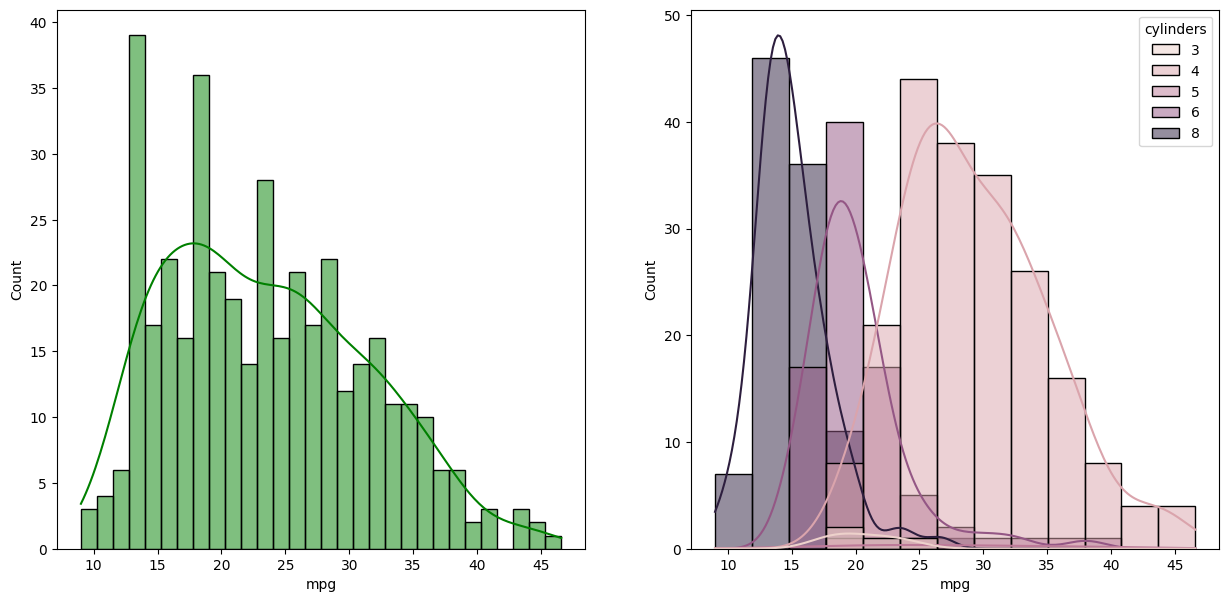

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='mpg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='mpg',kde=True,hue='cylinders')
plt.show()

#### **General Insights**:
**Fuel Efficiency** : The number of cylinders is inversely related to fuel efficiency (mpg). 

Cars with fewer cylinders (3 or 4) are generally more fuel-efficient, while those with 
more cylinders (6 or 8) are less fuel-efficient.

**Data Distribution** : The overall distribution shows that most cars fall within the 10-30 mpg range, but when broken down by cylinders, it is clear that different types of engines 
have distinct mpg characteristics.

**Peaks and Variability** : The peaks in the histograms suggest that certain mpg values are more common, possibly reflecting popular car models or engine types

#### 3.1- CHECKING OUTLIERS

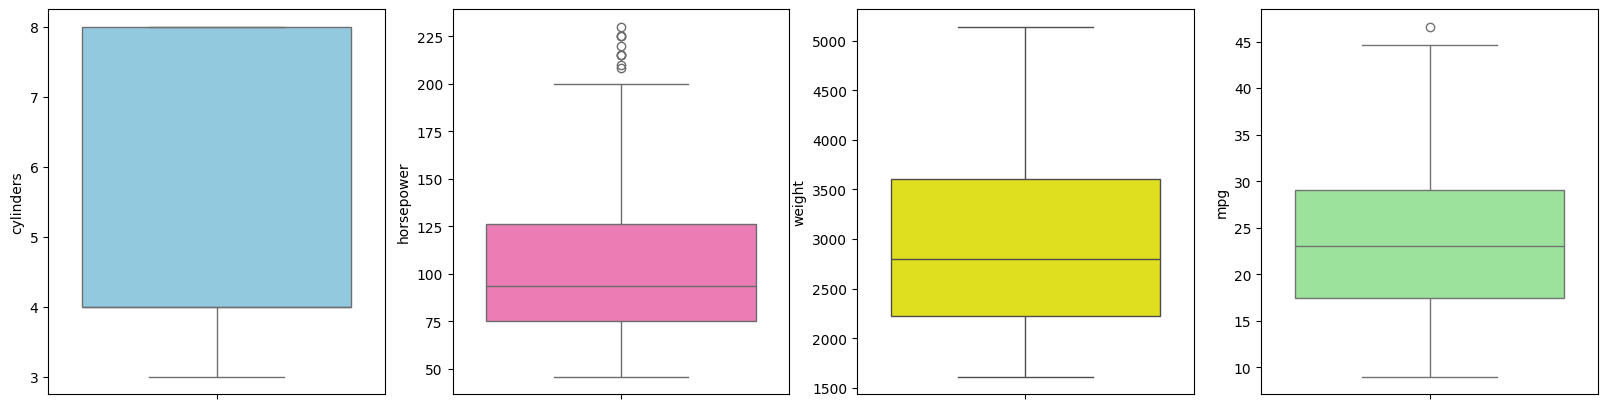

In [59]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(data['cylinders'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['horsepower'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['weight'],color='yellow')
plt.subplot(144)
sns.boxplot(data['mpg'],color='lightgreen')
plt.show()

#### **Insight**
In general there is no outliers in the data , except fot the horsepower feature that has some outliers